In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
dataset = pd.read_excel(r'D:\NSP ML\ML FINAL FILES\PRE-ML-TESTING.xlsx')
d1 = pd.get_dummies(dataset)

In [3]:
dataset['FK_FLAG'].value_counts()

0    206
1    116
Name: FK_FLAG, dtype: int64

In [4]:
print('Percentage of data where class = 1 is : ',(len(dataset[dataset['FK_FLAG'] == 1])/ len(dataset))*100)

Percentage of data where class = 1 is :  36.024844720496894


In [5]:
d1.columns

Index(['c_institution_id', 'max_application_level', 'min_application_level',
       'avg_application_level', 'median_as_application_level',
       'max_annual_family_income', 'min_annual_family_income',
       'avg_annual_family_income', 'median_annual_family_income',
       'count_of_application_id', 'count_of_in_rank', 'Percent_Inrank',
       'sunday', 'average_of_verification_time', 'ZERO',
       'average_scholarship_amount', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7',
       'R8', 'M', 'F', 'T', 'CountOfIp Address', 'FK_FLAG', 'MaxOfAc Year_0',
       'MaxOfAc Year_2013-14', 'MaxOfAc Year_2014-15', 'MaxOfAc Year_2015-16',
       'MaxOfAc Year_2016-17', 'MaxOfAc Year_2017-18', 'PREPOST_PRE'],
      dtype='object')

In [6]:
X = d1.drop(columns=['FK_FLAG','c_institution_id','PREPOST_PRE','CountOfIp Address'])
Y = d1.iloc[:, 28]

In [7]:
X.shape

(322, 32)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [9]:
print(f'Shape of X_train :{X_train.shape}')
print(f'Shape of X_test :{X_test.shape}')
print(f'Shape of y_train :{y_train.shape}')
print(f'Shape of y_test :{y_test.shape}')

Shape of X_train :(257, 32)
Shape of X_test :(65, 32)
Shape of y_train :(257,)
Shape of y_test :(65,)


In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve
train_scores = []
test_scores = []
values = [i for i in range(1, 31)]
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i, random_state=0)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score( y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	#print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

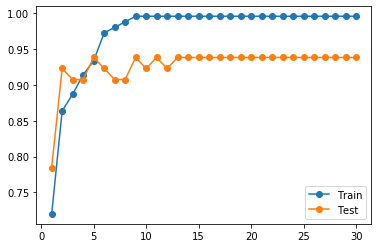

In [15]:
from matplotlib import pyplot
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [16]:

random_forest = RandomForestClassifier(max_depth=15, random_state=0)
random_forest.fit(X_train,y_train)


random_forest_pred = random_forest.predict(X_test)
#accuracy_score(random_forest_pred,y_test)
cm1 = confusion_matrix(y_test,random_forest_pred)
print('Random Forest Classifier\n',cm1)

Random Forest Classifier
 [[45  2]
 [ 2 16]]


In [17]:
x = pd.read_csv(r'D:\NSP ML\ML FINAL FILES\PREMATRIC-MODEL.csv')
X_T = x.drop(columns=['c_institution_id','PRE POST','CountOfIp Address'])

In [18]:
x.columns

Index(['c_institution_id', 'max_application_level', 'min_application_level',
       'avg_application_level', 'median_as_application_level',
       'max_annual_family_income', 'min_annual_family_income',
       'avg_annual_family_income', 'median_annual_family_income',
       'count_of_application_id', 'count_of_in_rank', 'Percent_Inrank',
       'sunday', 'average_of_verification_time', 'ZERO', 'MaxOfAc Year',
       'average_scholarship_amount', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7',
       'R8', 'M', 'F', 'T', 'CountOfIp Address', 'PRE POST'],
      dtype='object')

In [19]:
X_T.isnull().sum()

max_application_level            51987
min_application_level            51987
avg_application_level            51987
median_as_application_level      51987
max_annual_family_income             0
min_annual_family_income             0
avg_annual_family_income             0
median_annual_family_income          0
count_of_application_id              0
count_of_in_rank                     0
Percent_Inrank                       0
sunday                          149705
average_of_verification_time     52027
ZERO                            253490
MaxOfAc Year                    253490
average_scholarship_amount       56874
R1                                   0
R2                                   0
R3                                   0
R4                                   0
R5                                   0
R6                                   0
R7                                   0
R8                                   0
M                                    0
F                        

In [20]:
X_T.fillna(0, inplace=True)

In [21]:
X_T = pd.get_dummies(X_T)
X_T_pred = random_forest.predict(X_T)
X_T['Pred FK_FLAG'] = X_T_pred
X_T['c_institution_id'] = x['c_institution_id']

In [22]:
X_T.to_csv('D:/NSP ML/PreTest_final.csv',index=False)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1, 5],
           'epochs': [100, 120],
           'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                        param_grid = parameters,
                        scoring = 'accuracy',
                        cv = 10)
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
231/231 [==============================] - 1s 906us/step - loss: 0.6885 - accuracy: 0.6428
Epoch 2/100
231/231 [==============================] - 0s 873us/step - loss: 0.5247 - accuracy: 0.7311
Epoch 3/100
231/231 [==============================] - 0s 946us/step - loss: 0.3847 - accuracy: 0.8393
Epoch 4/100
231/231 [==============================] - 0s 963us/step - loss: 0.3072 - accuracy: 0.8436
Epoch 5/100
231/231 [==============================] - 0s 817us/step - loss: 0.3093 - accuracy: 0.8600
Epoch 6/100
231/231 [==============================] - 0s 792us/step - loss: 0.3069 - accuracy: 0.8577
Epoch 7/100
231/231 [==============================] - 0s 854us/step - loss: 0.2627 - accuracy: 0.8863
Epoch 8/100
231/231 [==============================] - 0s 822us/step - loss: 0.2248 - accuracy: 0.9165
Epoch 9/100
231/231 [==============================] - 0s 796us/step - loss: 0.2733 - accuracy: 0.8905
Epoch 10/100
231/231 [==============================] - 0s 983us/step - l

D:\anac\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


231/231 [==============================] - 0s 815us/step - loss: 0.6879 - accuracy: 0.6198
Epoch 2/100
231/231 [==============================] - 0s 773us/step - loss: 0.4854 - accuracy: 0.5824
Epoch 3/100
231/231 [==============================] - 0s 775us/step - loss: 0.3808 - accuracy: 0.7579
Epoch 4/100
231/231 [==============================] - 0s 784us/step - loss: 0.3818 - accuracy: 0.8413
Epoch 5/100
231/231 [==============================] - 0s 794us/step - loss: 0.3766 - accuracy: 0.8796
Epoch 6/100
231/231 [==============================] - 0s 792us/step - loss: 0.3276 - accuracy: 0.8721
Epoch 7/100
231/231 [==============================] - 0s 809us/step - loss: 0.3868 - accuracy: 0.8755
Epoch 8/100
231/231 [==============================] - 0s 789us/step - loss: 0.3722 - accuracy: 0.8369
Epoch 9/100
231/231 [==============================] - 0s 780us/step - loss: 0.3643 - accuracy: 0.9023
Epoch 10/100
231/231 [==============================] - 0s 779us/step - loss: 0.3374 

Epoch 80/100
231/231 [==============================] - 0s 850us/step - loss: 0.1854 - accuracy: 0.9320
Epoch 81/100
231/231 [==============================] - 0s 820us/step - loss: 0.1425 - accuracy: 0.9492
Epoch 82/100
231/231 [==============================] - 0s 856us/step - loss: 0.1723 - accuracy: 0.9433
Epoch 83/100
231/231 [==============================] - 0s 826us/step - loss: 0.2024 - accuracy: 0.9324
Epoch 84/100
231/231 [==============================] - 0s 840us/step - loss: 0.1347 - accuracy: 0.9580
Epoch 85/100
231/231 [==============================] - 0s 829us/step - loss: 0.1223 - accuracy: 0.9677
Epoch 86/100
231/231 [==============================] - 0s 844us/step - loss: 0.2150 - accuracy: 0.9152
Epoch 87/100
231/231 [==============================] - 0s 865us/step - loss: 0.1765 - accuracy: 0.9393
Epoch 88/100
231/231 [==============================] - 0s 835us/step - loss: 0.1377 - accuracy: 0.9638
Epoch 89/100
231/231 [==============================] - 0s 868us

Epoch 37/100
231/231 [==============================] - 0s 780us/step - loss: 0.1271 - accuracy: 0.9528
Epoch 38/100
231/231 [==============================] - 0s 797us/step - loss: 0.1068 - accuracy: 0.9453
Epoch 39/100
231/231 [==============================] - 0s 867us/step - loss: 0.0869 - accuracy: 0.9689
Epoch 40/100
231/231 [==============================] - 0s 822us/step - loss: 0.0983 - accuracy: 0.9682
Epoch 41/100
231/231 [==============================] - 0s 779us/step - loss: 0.0975 - accuracy: 0.9565
Epoch 42/100
231/231 [==============================] - 0s 869us/step - loss: 0.0899 - accuracy: 0.9493
Epoch 43/100
231/231 [==============================] - 0s 894us/step - loss: 0.0711 - accuracy: 0.9842
Epoch 44/100
231/231 [==============================] - 0s 852us/step - loss: 0.0741 - accuracy: 0.9733
Epoch 45/100
231/231 [==============================] - 0s 759us/step - loss: 0.0624 - accuracy: 0.9869
Epoch 46/100
231/231 [==============================] - 0s 788us

231/231 [==============================] - 0s 885us/step - loss: 0.1373 - accuracy: 0.9594
Epoch 94/100
231/231 [==============================] - 0s 860us/step - loss: 0.0841 - accuracy: 0.9791
Epoch 95/100
231/231 [==============================] - 0s 870us/step - loss: 0.1645 - accuracy: 0.9496
Epoch 96/100
231/231 [==============================] - 0s 861us/step - loss: 0.0783 - accuracy: 0.9819
Epoch 97/100
231/231 [==============================] - 0s 862us/step - loss: 0.1222 - accuracy: 0.9642
Epoch 98/100
231/231 [==============================] - 0s 902us/step - loss: 0.0711 - accuracy: 0.9826
Epoch 99/100
231/231 [==============================] - 0s 874us/step - loss: 0.1031 - accuracy: 0.9754
Epoch 100/100
231/231 [==============================] - 0s 887us/step - loss: 0.0587 - accuracy: 0.9899
Epoch 1/100
231/231 [==============================] - 1s 894us/step - loss: 0.6817 - accuracy: 0.6426
Epoch 2/100
231/231 [==============================] - 0s 845us/step - loss: 

Epoch 72/100
231/231 [==============================] - 0s 801us/step - loss: 0.1594 - accuracy: 0.9466
Epoch 73/100
231/231 [==============================] - 0s 764us/step - loss: 0.1656 - accuracy: 0.9410
Epoch 74/100
231/231 [==============================] - 0s 787us/step - loss: 0.1233 - accuracy: 0.9674
Epoch 75/100
231/231 [==============================] - 0s 789us/step - loss: 0.1892 - accuracy: 0.9440
Epoch 76/100
231/231 [==============================] - 0s 793us/step - loss: 0.1252 - accuracy: 0.9665
Epoch 77/100
231/231 [==============================] - 0s 867us/step - loss: 0.1197 - accuracy: 0.9632
Epoch 78/100
231/231 [==============================] - 0s 844us/step - loss: 0.1522 - accuracy: 0.9500
Epoch 79/100
231/231 [==============================] - 0s 860us/step - loss: 0.1285 - accuracy: 0.9591
Epoch 80/100
231/231 [==============================] - 0s 841us/step - loss: 0.1405 - accuracy: 0.9516
Epoch 81/100
231/231 [==============================] - 0s 837us

Epoch 29/100
232/232 [==============================] - 0s 827us/step - loss: 0.6693 - accuracy: 0.6094
Epoch 30/100
232/232 [==============================] - 0s 885us/step - loss: 0.6626 - accuracy: 0.6238
Epoch 31/100
232/232 [==============================] - 0s 933us/step - loss: 0.6934 - accuracy: 0.5568
Epoch 32/100
232/232 [==============================] - 0s 933us/step - loss: 0.6632 - accuracy: 0.6225
Epoch 33/100
232/232 [==============================] - 0s 894us/step - loss: 0.6768 - accuracy: 0.5931
Epoch 34/100
232/232 [==============================] - 0s 773us/step - loss: 0.6615 - accuracy: 0.6259
Epoch 35/100
232/232 [==============================] - 0s 781us/step - loss: 0.6779 - accuracy: 0.5907
Epoch 36/100
232/232 [==============================] - 0s 812us/step - loss: 0.6366 - accuracy: 0.6793
Epoch 37/100
232/232 [==============================] - 0s 775us/step - loss: 0.6762 - accuracy: 0.5942
Epoch 38/100
232/232 [==============================] - 0s 840us

232/232 [==============================] - 0s 831us/step - loss: 0.0334 - accuracy: 0.9784
Epoch 86/100
232/232 [==============================] - 0s 789us/step - loss: 0.0275 - accuracy: 0.9809
Epoch 87/100
232/232 [==============================] - 0s 822us/step - loss: 0.2740 - accuracy: 0.9576
Epoch 88/100
232/232 [==============================] - 0s 793us/step - loss: 0.0472 - accuracy: 0.9858
Epoch 89/100
232/232 [==============================] - 0s 833us/step - loss: 0.1171 - accuracy: 0.9723
Epoch 90/100
232/232 [==============================] - 0s 800us/step - loss: 0.0231 - accuracy: 0.9812
Epoch 91/100
232/232 [==============================] - 0s 803us/step - loss: 0.0237 - accuracy: 0.9905
Epoch 92/100
232/232 [==============================] - 0s 843us/step - loss: 0.0137 - accuracy: 0.9941
Epoch 93/100
232/232 [==============================] - 0s 823us/step - loss: 0.0327 - accuracy: 0.9751
Epoch 94/100
232/232 [==============================] - 0s 868us/step - loss:

Epoch 64/100
232/232 [==============================] - 0s 846us/step - loss: 0.2074 - accuracy: 0.9285
Epoch 65/100
232/232 [==============================] - 0s 864us/step - loss: 0.1296 - accuracy: 0.9661
Epoch 66/100
232/232 [==============================] - 0s 828us/step - loss: 0.1202 - accuracy: 0.9723
Epoch 67/100
232/232 [==============================] - 0s 817us/step - loss: 0.1639 - accuracy: 0.9523
Epoch 68/100
232/232 [==============================] - 0s 872us/step - loss: 0.1901 - accuracy: 0.9373
Epoch 69/100
232/232 [==============================] - 0s 813us/step - loss: 0.1714 - accuracy: 0.9467
Epoch 70/100
232/232 [==============================] - 0s 995us/step - loss: 0.1378 - accuracy: 0.9584
Epoch 71/100
232/232 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9353
Epoch 72/100
232/232 [==============================] - 0s 857us/step - loss: 0.2351 - accuracy: 0.9200
Epoch 73/100
232/232 [==============================] - 0s 967us/s

231/231 [==============================] - 0s 769us/step - loss: 0.2379 - accuracy: 0.8927
Epoch 22/100
231/231 [==============================] - 0s 854us/step - loss: 0.2849 - accuracy: 0.8899
Epoch 23/100
231/231 [==============================] - 0s 932us/step - loss: 0.2519 - accuracy: 0.8931
Epoch 24/100
231/231 [==============================] - 0s 850us/step - loss: 0.2411 - accuracy: 0.8966
Epoch 25/100
231/231 [==============================] - 0s 795us/step - loss: 0.2464 - accuracy: 0.8948
Epoch 26/100
231/231 [==============================] - 0s 838us/step - loss: 0.3019 - accuracy: 0.8870
Epoch 27/100
231/231 [==============================] - 0s 850us/step - loss: 0.1619 - accuracy: 0.9471
Epoch 28/100
231/231 [==============================] - 0s 831us/step - loss: 0.2936 - accuracy: 0.8814
Epoch 29/100
231/231 [==============================] - 0s 820us/step - loss: 0.2562 - accuracy: 0.8966
Epoch 30/100
231/231 [==============================] - 0s 804us/step - loss:

231/231 [==============================] - 0s 873us/step - loss: 0.1907 - accuracy: 0.9231
Epoch 78/100
231/231 [==============================] - 0s 803us/step - loss: 0.1548 - accuracy: 0.9431
Epoch 79/100
231/231 [==============================] - 0s 828us/step - loss: 0.2064 - accuracy: 0.9187
Epoch 80/100
231/231 [==============================] - 0s 835us/step - loss: 0.2203 - accuracy: 0.9041
Epoch 81/100
231/231 [==============================] - 0s 812us/step - loss: 0.1380 - accuracy: 0.9360
Epoch 82/100
231/231 [==============================] - 0s 815us/step - loss: 0.2210 - accuracy: 0.9118
Epoch 83/100
231/231 [==============================] - 0s 812us/step - loss: 0.2279 - accuracy: 0.9075
Epoch 84/100
231/231 [==============================] - 0s 826us/step - loss: 0.2002 - accuracy: 0.9195
Epoch 85/100
231/231 [==============================] - 0s 833us/step - loss: 0.1527 - accuracy: 0.9327
Epoch 86/100
231/231 [==============================] - 0s 828us/step - loss:

Epoch 56/100
231/231 [==============================] - 0s 788us/step - loss: 0.2209 - accuracy: 0.9139
Epoch 57/100
231/231 [==============================] - 0s 789us/step - loss: 0.3777 - accuracy: 0.8669
Epoch 58/100
231/231 [==============================] - 0s 795us/step - loss: 0.2401 - accuracy: 0.9335
Epoch 59/100
231/231 [==============================] - 0s 826us/step - loss: 0.3274 - accuracy: 0.9130
Epoch 60/100
231/231 [==============================] - 0s 834us/step - loss: 0.2552 - accuracy: 0.9271
Epoch 61/100
231/231 [==============================] - 0s 787us/step - loss: 0.2882 - accuracy: 0.8912
Epoch 62/100
231/231 [==============================] - 0s 791us/step - loss: 0.3047 - accuracy: 0.9166
Epoch 63/100
231/231 [==============================] - 0s 848us/step - loss: 0.2729 - accuracy: 0.9041
Epoch 64/100
231/231 [==============================] - 0s 790us/step - loss: 0.3727 - accuracy: 0.8866
Epoch 65/100
231/231 [==============================] - 0s 818us

231/231 [==============================] - 0s 784us/step - loss: 0.3896 - accuracy: 0.8207
Epoch 14/100
231/231 [==============================] - 0s 807us/step - loss: 0.4103 - accuracy: 0.8248
Epoch 15/100
231/231 [==============================] - 0s 758us/step - loss: 0.3774 - accuracy: 0.8675
Epoch 16/100
231/231 [==============================] - 0s 778us/step - loss: 0.3666 - accuracy: 0.8320
Epoch 17/100
231/231 [==============================] - 0s 805us/step - loss: 0.3419 - accuracy: 0.8774
Epoch 18/100
231/231 [==============================] - 0s 847us/step - loss: 0.3496 - accuracy: 0.8677
Epoch 19/100
231/231 [==============================] - 0s 782us/step - loss: 0.3813 - accuracy: 0.8526
Epoch 20/100
231/231 [==============================] - 0s 755us/step - loss: 0.3668 - accuracy: 0.8532
Epoch 21/100
231/231 [==============================] - 0s 785us/step - loss: 0.3575 - accuracy: 0.8661
Epoch 22/100
231/231 [==============================] - 0s 874us/step - loss:

Epoch 70/100
231/231 [==============================] - 0s 861us/step - loss: 0.2296 - accuracy: 0.8932
Epoch 71/100
231/231 [==============================] - 0s 877us/step - loss: 0.3151 - accuracy: 0.8750
Epoch 72/100
231/231 [==============================] - 0s 845us/step - loss: 0.2099 - accuracy: 0.9237
Epoch 73/100
231/231 [==============================] - 0s 841us/step - loss: 0.2207 - accuracy: 0.9143
Epoch 74/100
231/231 [==============================] - 0s 861us/step - loss: 0.2905 - accuracy: 0.9071
Epoch 75/100
231/231 [==============================] - 0s 849us/step - loss: 0.2198 - accuracy: 0.9155
Epoch 76/100
231/231 [==============================] - 0s 837us/step - loss: 0.2428 - accuracy: 0.9262
Epoch 77/100
231/231 [==============================] - 0s 887us/step - loss: 0.1875 - accuracy: 0.9252
Epoch 78/100
231/231 [==============================] - 0s 846us/step - loss: 0.1819 - accuracy: 0.9155
Epoch 79/100
231/231 [==============================] - 0s 835us

Epoch 27/100
232/232 [==============================] - 0s 836us/step - loss: 0.3741 - accuracy: 0.8367
Epoch 28/100
232/232 [==============================] - 0s 839us/step - loss: 0.3858 - accuracy: 0.8336
Epoch 29/100
232/232 [==============================] - 0s 839us/step - loss: 0.2799 - accuracy: 0.8751
Epoch 30/100
232/232 [==============================] - 0s 795us/step - loss: 0.2799 - accuracy: 0.8965
Epoch 31/100
232/232 [==============================] - 0s 828us/step - loss: 0.3988 - accuracy: 0.8669
Epoch 32/100
232/232 [==============================] - 0s 835us/step - loss: 0.3067 - accuracy: 0.8898
Epoch 33/100
232/232 [==============================] - 0s 822us/step - loss: 0.2842 - accuracy: 0.8920
Epoch 34/100
232/232 [==============================] - 0s 808us/step - loss: 0.4556 - accuracy: 0.8403
Epoch 35/100
232/232 [==============================] - 0s 839us/step - loss: 0.2924 - accuracy: 0.9098
Epoch 36/100
232/232 [==============================] - 0s 789us

232/232 [==============================] - 0s 795us/step - loss: 0.1574 - accuracy: 0.9438
Epoch 84/100
232/232 [==============================] - 0s 778us/step - loss: 0.2111 - accuracy: 0.9328
Epoch 85/100
232/232 [==============================] - 0s 756us/step - loss: 0.1612 - accuracy: 0.9425
Epoch 86/100
232/232 [==============================] - 0s 747us/step - loss: 0.1240 - accuracy: 0.9530
Epoch 87/100
232/232 [==============================] - 0s 751us/step - loss: 0.1755 - accuracy: 0.9355
Epoch 88/100
232/232 [==============================] - 0s 777us/step - loss: 0.1233 - accuracy: 0.9611
Epoch 89/100
232/232 [==============================] - 0s 765us/step - loss: 0.1305 - accuracy: 0.9545
Epoch 90/100
232/232 [==============================] - 0s 760us/step - loss: 0.1560 - accuracy: 0.9448
Epoch 91/100
232/232 [==============================] - 0s 771us/step - loss: 0.1234 - accuracy: 0.9665
Epoch 92/100
232/232 [==============================] - 0s 769us/step - loss:

Epoch 62/120
231/231 [==============================] - 0s 791us/step - loss: 0.0241 - accuracy: 0.9978
Epoch 63/120
231/231 [==============================] - 0s 773us/step - loss: 0.0223 - accuracy: 0.9943
Epoch 64/120
231/231 [==============================] - 0s 788us/step - loss: 0.0467 - accuracy: 0.9845
Epoch 65/120
231/231 [==============================] - 0s 788us/step - loss: 0.0462 - accuracy: 0.9840
Epoch 66/120
231/231 [==============================] - 0s 796us/step - loss: 0.0539 - accuracy: 0.9840
Epoch 67/120
231/231 [==============================] - 0s 799us/step - loss: 0.0254 - accuracy: 0.9948
Epoch 68/120
231/231 [==============================] - 0s 785us/step - loss: 0.0303 - accuracy: 0.9892
Epoch 69/120
231/231 [==============================] - 0s 805us/step - loss: 0.0279 - accuracy: 0.9890
Epoch 70/120
231/231 [==============================] - 0s 831us/step - loss: 0.0332 - accuracy: 0.9913
Epoch 71/120
231/231 [==============================] - 0s 834us

231/231 [==============================] - 0s 846us/step - loss: 0.0289 - accuracy: 0.9971
Epoch 99/120
231/231 [==============================] - 0s 853us/step - loss: 0.0084 - accuracy: 0.9962
Epoch 100/120
231/231 [==============================] - 0s 849us/step - loss: 0.0228 - accuracy: 0.9893
Epoch 101/120
231/231 [==============================] - 0s 836us/step - loss: 0.0069 - accuracy: 0.9960
Epoch 102/120
231/231 [==============================] - 0s 863us/step - loss: 0.0265 - accuracy: 0.9746
Epoch 103/120
231/231 [==============================] - 0s 826us/step - loss: 0.0184 - accuracy: 0.9857
Epoch 104/120
231/231 [==============================] - 0s 839us/step - loss: 0.0039 - accuracy: 0.9996
Epoch 105/120
231/231 [==============================] - 0s 844us/step - loss: 0.0118 - accuracy: 0.9983
Epoch 106/120
231/231 [==============================] - 0s 821us/step - loss: 0.0110 - accuracy: 0.9981
Epoch 107/120
231/231 [==============================] - 0s 835us/step

231/231 [==============================] - 0s 929us/step - loss: 0.1841 - accuracy: 0.9326
Epoch 15/120
231/231 [==============================] - 0s 921us/step - loss: 0.2400 - accuracy: 0.8985
Epoch 16/120
231/231 [==============================] - 0s 883us/step - loss: 0.2400 - accuracy: 0.9144
Epoch 17/120
231/231 [==============================] - 0s 857us/step - loss: 0.1653 - accuracy: 0.9397
Epoch 18/120
231/231 [==============================] - 0s 881us/step - loss: 0.1814 - accuracy: 0.9353
Epoch 19/120
231/231 [==============================] - 0s 889us/step - loss: 0.2300 - accuracy: 0.9201
Epoch 20/120
231/231 [==============================] - 0s 886us/step - loss: 0.2036 - accuracy: 0.9198
Epoch 21/120
231/231 [==============================] - 0s 904us/step - loss: 0.1586 - accuracy: 0.9210
Epoch 22/120
231/231 [==============================] - 0s 870us/step - loss: 0.1664 - accuracy: 0.9230
Epoch 23/120
231/231 [==============================] - 0s 883us/step - loss:

231/231 [==============================] - 0s 842us/step - loss: 0.0614 - accuracy: 0.9859
Epoch 51/120
231/231 [==============================] - 0s 821us/step - loss: 0.0536 - accuracy: 0.9866
Epoch 52/120
231/231 [==============================] - 0s 832us/step - loss: 0.1035 - accuracy: 0.9505
Epoch 53/120
231/231 [==============================] - 0s 818us/step - loss: 0.0352 - accuracy: 0.9947
Epoch 54/120
231/231 [==============================] - 0s 857us/step - loss: 0.0603 - accuracy: 0.9801
Epoch 55/120
231/231 [==============================] - 0s 843us/step - loss: 0.0732 - accuracy: 0.9787
Epoch 56/120
231/231 [==============================] - 0s 836us/step - loss: 0.0616 - accuracy: 0.9793
Epoch 57/120
231/231 [==============================] - 0s 829us/step - loss: 0.0306 - accuracy: 0.9946
Epoch 58/120
231/231 [==============================] - 0s 803us/step - loss: 0.0466 - accuracy: 0.9874
Epoch 59/120
231/231 [==============================] - 0s 823us/step - loss:

Epoch 87/120
231/231 [==============================] - 0s 849us/step - loss: 0.6552 - accuracy: 0.6372
Epoch 88/120
231/231 [==============================] - 0s 836us/step - loss: 0.6783 - accuracy: 0.5946
Epoch 89/120
231/231 [==============================] - 0s 823us/step - loss: 0.6503 - accuracy: 0.6462
Epoch 90/120
231/231 [==============================] - 0s 862us/step - loss: 0.6487 - accuracy: 0.6491
Epoch 91/120
231/231 [==============================] - 0s 831us/step - loss: 0.6364 - accuracy: 0.6717
Epoch 92/120
231/231 [==============================] - 0s 833us/step - loss: 0.6693 - accuracy: 0.6112
Epoch 93/120
231/231 [==============================] - 0s 906us/step - loss: 0.6608 - accuracy: 0.6268
Epoch 94/120
231/231 [==============================] - 0s 890us/step - loss: 0.6446 - accuracy: 0.6567
Epoch 95/120
231/231 [==============================] - 0s 920us/step - loss: 0.6490 - accuracy: 0.6489
Epoch 96/120
231/231 [==============================] - 0s 844us

232/232 [==============================] - 0s 841us/step - loss: 0.6835 - accuracy: 0.6026
Epoch 4/120
232/232 [==============================] - 0s 803us/step - loss: 0.6809 - accuracy: 0.6020
Epoch 5/120
232/232 [==============================] - 0s 815us/step - loss: 0.6755 - accuracy: 0.6218
Epoch 6/120
232/232 [==============================] - 0s 817us/step - loss: 0.6768 - accuracy: 0.6033
Epoch 7/120
232/232 [==============================] - 0s 854us/step - loss: 0.6756 - accuracy: 0.6030
Epoch 8/120
232/232 [==============================] - 0s 828us/step - loss: 0.6626 - accuracy: 0.6479
Epoch 9/120
232/232 [==============================] - 0s 803us/step - loss: 0.6707 - accuracy: 0.6142
Epoch 10/120
232/232 [==============================] - 0s 836us/step - loss: 0.6726 - accuracy: 0.6054
Epoch 11/120
232/232 [==============================] - 0s 957us/step - loss: 0.6764 - accuracy: 0.5920
Epoch 12/120
232/232 [==============================] - 0s 1ms/step - loss: 0.6459 

232/232 [==============================] - 0s 843us/step - loss: 0.6373 - accuracy: 0.6763
Epoch 83/120
232/232 [==============================] - 0s 844us/step - loss: 0.6630 - accuracy: 0.6226
Epoch 84/120
232/232 [==============================] - 0s 834us/step - loss: 0.6358 - accuracy: 0.6794
Epoch 85/120
232/232 [==============================] - 0s 850us/step - loss: 0.6931 - accuracy: 0.5591
Epoch 86/120
232/232 [==============================] - 0s 868us/step - loss: 0.6755 - accuracy: 0.5963
Epoch 87/120
232/232 [==============================] - 0s 839us/step - loss: 0.6792 - accuracy: 0.5886
Epoch 88/120
232/232 [==============================] - 0s 857us/step - loss: 0.6608 - accuracy: 0.6276
Epoch 89/120
232/232 [==============================] - 0s 826us/step - loss: 0.6951 - accuracy: 0.5545
Epoch 90/120
232/232 [==============================] - 0s 873us/step - loss: 0.6637 - accuracy: 0.6209
Epoch 91/120
232/232 [==============================] - 0s 851us/step - loss:

232/232 [==============================] - 0s 862us/step - loss: 0.1976 - accuracy: 0.9276
Epoch 119/120
232/232 [==============================] - 0s 887us/step - loss: 0.1644 - accuracy: 0.9485
Epoch 120/120
232/232 [==============================] - 0s 832us/step - loss: 0.1719 - accuracy: 0.9417
Epoch 1/120
232/232 [==============================] - 0s 804us/step - loss: 0.6915 - accuracy: 0.5433
Epoch 2/120
232/232 [==============================] - 0s 791us/step - loss: 0.6874 - accuracy: 0.6017
Epoch 3/120
232/232 [==============================] - 0s 785us/step - loss: 0.6873 - accuracy: 0.5685
Epoch 4/120
232/232 [==============================] - 0s 757us/step - loss: 0.6770 - accuracy: 0.6320
Epoch 5/120
232/232 [==============================] - 0s 749us/step - loss: 0.6710 - accuracy: 0.6446
Epoch 6/120
232/232 [==============================] - 0s 798us/step - loss: 0.6720 - accuracy: 0.6278
Epoch 7/120
232/232 [==============================] - 0s 774us/step - loss: 0.67

231/231 [==============================] - 0s 794us/step - loss: 0.2844 - accuracy: 0.8794
Epoch 35/120
231/231 [==============================] - 0s 799us/step - loss: 0.2548 - accuracy: 0.9059
Epoch 36/120
231/231 [==============================] - 0s 793us/step - loss: 0.3144 - accuracy: 0.8775
Epoch 37/120
231/231 [==============================] - 0s 832us/step - loss: 0.2788 - accuracy: 0.8983
Epoch 38/120
231/231 [==============================] - 0s 810us/step - loss: 0.2695 - accuracy: 0.8865
Epoch 39/120
231/231 [==============================] - 0s 828us/step - loss: 0.2045 - accuracy: 0.9424
Epoch 40/120
231/231 [==============================] - 0s 831us/step - loss: 0.1954 - accuracy: 0.9243
Epoch 41/120
231/231 [==============================] - 0s 834us/step - loss: 0.2881 - accuracy: 0.8735
Epoch 42/120
231/231 [==============================] - 0s 816us/step - loss: 0.1679 - accuracy: 0.9289
Epoch 43/120
231/231 [==============================] - 0s 840us/step - loss:

231/231 [==============================] - 0s 777us/step - loss: 0.1862 - accuracy: 0.9512
Epoch 71/120
231/231 [==============================] - 0s 778us/step - loss: 0.2746 - accuracy: 0.9260
Epoch 72/120
231/231 [==============================] - 0s 793us/step - loss: 0.3072 - accuracy: 0.9075
Epoch 73/120
231/231 [==============================] - 0s 803us/step - loss: 0.1789 - accuracy: 0.9572
Epoch 74/120
231/231 [==============================] - 0s 787us/step - loss: 0.2299 - accuracy: 0.9314
Epoch 75/120
231/231 [==============================] - 0s 786us/step - loss: 0.3117 - accuracy: 0.9033
Epoch 76/120
231/231 [==============================] - 0s 792us/step - loss: 0.2482 - accuracy: 0.9321
Epoch 77/120
231/231 [==============================] - 0s 789us/step - loss: 0.3463 - accuracy: 0.9223
Epoch 78/120
231/231 [==============================] - 0s 782us/step - loss: 0.2251 - accuracy: 0.9373
Epoch 79/120
231/231 [==============================] - 0s 783us/step - loss:

231/231 [==============================] - 0s 786us/step - loss: 0.6666 - accuracy: 0.6162
Epoch 107/120
231/231 [==============================] - 0s 783us/step - loss: 0.6756 - accuracy: 0.5995
Epoch 108/120
231/231 [==============================] - 0s 798us/step - loss: 0.6603 - accuracy: 0.6280
Epoch 109/120
231/231 [==============================] - 0s 789us/step - loss: 0.6669 - accuracy: 0.6156
Epoch 110/120
231/231 [==============================] - 0s 780us/step - loss: 0.6696 - accuracy: 0.6103
Epoch 111/120
231/231 [==============================] - 0s 789us/step - loss: 0.6511 - accuracy: 0.6450
Epoch 112/120
231/231 [==============================] - 0s 792us/step - loss: 0.6659 - accuracy: 0.6174
Epoch 113/120
231/231 [==============================] - 0s 784us/step - loss: 0.6768 - accuracy: 0.5971
Epoch 114/120
231/231 [==============================] - 0s 740us/step - loss: 0.6873 - accuracy: 0.5773
Epoch 115/120
231/231 [==============================] - 0s 779us/ste

231/231 [==============================] - 0s 776us/step - loss: 0.2575 - accuracy: 0.8757
Epoch 23/120
231/231 [==============================] - 0s 792us/step - loss: 0.3424 - accuracy: 0.8428
Epoch 24/120
231/231 [==============================] - 0s 802us/step - loss: 0.3948 - accuracy: 0.8565
Epoch 25/120
231/231 [==============================] - 0s 797us/step - loss: 0.2752 - accuracy: 0.8809
Epoch 26/120
231/231 [==============================] - 0s 839us/step - loss: 0.2950 - accuracy: 0.8754
Epoch 27/120
231/231 [==============================] - 0s 809us/step - loss: 0.3764 - accuracy: 0.8736
Epoch 28/120
231/231 [==============================] - 0s 792us/step - loss: 0.2368 - accuracy: 0.8933
Epoch 29/120
231/231 [==============================] - 0s 816us/step - loss: 0.3026 - accuracy: 0.8743
Epoch 30/120
231/231 [==============================] - 0s 847us/step - loss: 0.1731 - accuracy: 0.9487
Epoch 31/120
231/231 [==============================] - 0s 805us/step - loss:

231/231 [==============================] - 0s 863us/step - loss: 0.1563 - accuracy: 0.9628
Epoch 59/120
231/231 [==============================] - 0s 866us/step - loss: 0.2746 - accuracy: 0.9158
Epoch 60/120
231/231 [==============================] - 0s 898us/step - loss: 0.2745 - accuracy: 0.9115
Epoch 61/120
231/231 [==============================] - 0s 741us/step - loss: 0.2209 - accuracy: 0.9417
Epoch 62/120
231/231 [==============================] - 0s 756us/step - loss: 0.2486 - accuracy: 0.9237
Epoch 63/120
231/231 [==============================] - 0s 776us/step - loss: 0.2026 - accuracy: 0.9244
Epoch 64/120
231/231 [==============================] - 0s 753us/step - loss: 0.2469 - accuracy: 0.9253
Epoch 65/120
231/231 [==============================] - 0s 756us/step - loss: 0.1844 - accuracy: 0.9521
Epoch 66/120
231/231 [==============================] - 0s 738us/step - loss: 0.2269 - accuracy: 0.9471
Epoch 67/120
231/231 [==============================] - 0s 754us/step - loss:

231/231 [==============================] - 0s 799us/step - loss: 0.2026 - accuracy: 0.9327
Epoch 95/120
231/231 [==============================] - 0s 784us/step - loss: 0.2462 - accuracy: 0.9310
Epoch 96/120
231/231 [==============================] - 0s 804us/step - loss: 0.2100 - accuracy: 0.9408
Epoch 97/120
231/231 [==============================] - 0s 865us/step - loss: 0.1476 - accuracy: 0.9542
Epoch 98/120
231/231 [==============================] - 0s 806us/step - loss: 0.2293 - accuracy: 0.9380
Epoch 99/120
231/231 [==============================] - 0s 720us/step - loss: 0.2557 - accuracy: 0.9346
Epoch 100/120
231/231 [==============================] - 0s 858us/step - loss: 0.2745 - accuracy: 0.9248
Epoch 101/120
231/231 [==============================] - 0s 780us/step - loss: 0.2194 - accuracy: 0.9368
Epoch 102/120
231/231 [==============================] - 0s 808us/step - loss: 0.1682 - accuracy: 0.9543
Epoch 103/120
231/231 [==============================] - 0s 862us/step - l

232/232 [==============================] - 0s 771us/step - loss: 0.2725 - accuracy: 0.8562
Epoch 11/120
232/232 [==============================] - 0s 820us/step - loss: 0.2352 - accuracy: 0.8903
Epoch 12/120
232/232 [==============================] - 0s 771us/step - loss: 0.3096 - accuracy: 0.8861
Epoch 13/120
232/232 [==============================] - 0s 785us/step - loss: 0.2914 - accuracy: 0.8709
Epoch 14/120
232/232 [==============================] - 0s 760us/step - loss: 0.3390 - accuracy: 0.8432
Epoch 15/120
232/232 [==============================] - 0s 780us/step - loss: 0.2828 - accuracy: 0.8792
Epoch 16/120
232/232 [==============================] - 0s 781us/step - loss: 0.3192 - accuracy: 0.8864
Epoch 17/120
232/232 [==============================] - 0s 770us/step - loss: 0.2943 - accuracy: 0.8784
Epoch 18/120
232/232 [==============================] - 0s 773us/step - loss: 0.2743 - accuracy: 0.8807
Epoch 19/120
232/232 [==============================] - 0s 844us/step - loss:

232/232 [==============================] - 0s 899us/step - loss: 0.3343 - accuracy: 0.8824
Epoch 47/120
232/232 [==============================] - 0s 831us/step - loss: 0.2668 - accuracy: 0.9152
Epoch 48/120
232/232 [==============================] - 0s 799us/step - loss: 0.2631 - accuracy: 0.9004
Epoch 49/120
232/232 [==============================] - 0s 773us/step - loss: 0.2925 - accuracy: 0.8815
Epoch 50/120
232/232 [==============================] - 0s 853us/step - loss: 0.2767 - accuracy: 0.8788
Epoch 51/120
232/232 [==============================] - 0s 786us/step - loss: 0.2099 - accuracy: 0.9117
Epoch 52/120
232/232 [==============================] - 0s 809us/step - loss: 0.2735 - accuracy: 0.9086
Epoch 53/120
232/232 [==============================] - 0s 765us/step - loss: 0.3081 - accuracy: 0.8697
Epoch 54/120
232/232 [==============================] - 0s 797us/step - loss: 0.2183 - accuracy: 0.9166
Epoch 55/120
232/232 [==============================] - 0s 808us/step - loss:

47/47 [==============================] - 0s 977us/step - loss: 0.6700 - accuracy: 0.6083
Epoch 85/100
47/47 [==============================] - 0s 955us/step - loss: 0.6747 - accuracy: 0.5990
Epoch 86/100
47/47 [==============================] - 0s 939us/step - loss: 0.6822 - accuracy: 0.5843
Epoch 87/100
47/47 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.6313
Epoch 88/100
47/47 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6540
Epoch 89/100
47/47 [==============================] - 0s 997us/step - loss: 0.6493 - accuracy: 0.6491
Epoch 90/100
47/47 [==============================] - 0s 937us/step - loss: 0.6507 - accuracy: 0.6462
Epoch 91/100
47/47 [==============================] - 0s 911us/step - loss: 0.6612 - accuracy: 0.6258
Epoch 92/100
47/47 [==============================] - 0s 947us/step - loss: 0.6411 - accuracy: 0.6652
Epoch 93/100
47/47 [==============================] - 0s 903us/step - loss: 0.6611 - accuracy: 0.62

47/47 [==============================] - 0s 970us/step - loss: 0.1980 - accuracy: 0.9217
Epoch 45/100
47/47 [==============================] - 0s 913us/step - loss: 0.1453 - accuracy: 0.9552
Epoch 46/100
47/47 [==============================] - 0s 945us/step - loss: 0.1519 - accuracy: 0.9586
Epoch 47/100
47/47 [==============================] - 0s 949us/step - loss: 0.1844 - accuracy: 0.9329
Epoch 48/100
47/47 [==============================] - 0s 891us/step - loss: 0.1633 - accuracy: 0.9439
Epoch 49/100
47/47 [==============================] - 0s 891us/step - loss: 0.1660 - accuracy: 0.9491
Epoch 50/100
47/47 [==============================] - 0s 922us/step - loss: 0.1693 - accuracy: 0.9429
Epoch 51/100
47/47 [==============================] - 0s 851us/step - loss: 0.1239 - accuracy: 0.9612
Epoch 52/100
47/47 [==============================] - 0s 872us/step - loss: 0.1538 - accuracy: 0.9471
Epoch 53/100
47/47 [==============================] - 0s 878us/step - loss: 0.1276 - accuracy: 

47/47 [==============================] - 0s 886us/step - loss: 0.4505 - accuracy: 0.6060
Epoch 5/100
47/47 [==============================] - 0s 895us/step - loss: 0.4141 - accuracy: 0.6018
Epoch 6/100
47/47 [==============================] - 0s 880us/step - loss: 0.4213 - accuracy: 0.8231
Epoch 7/100
47/47 [==============================] - 0s 909us/step - loss: 0.4186 - accuracy: 0.8851
Epoch 8/100
47/47 [==============================] - 0s 935us/step - loss: 0.3775 - accuracy: 0.8849
Epoch 9/100
47/47 [==============================] - 0s 863us/step - loss: 0.3556 - accuracy: 0.8863
Epoch 10/100
47/47 [==============================] - 0s 908us/step - loss: 0.3867 - accuracy: 0.8811
Epoch 11/100
47/47 [==============================] - 0s 926us/step - loss: 0.3542 - accuracy: 0.8897
Epoch 12/100
47/47 [==============================] - 0s 895us/step - loss: 0.3715 - accuracy: 0.8902
Epoch 13/100
47/47 [==============================] - 0s 935us/step - loss: 0.4044 - accuracy: 0.888

Epoch 65/100
47/47 [==============================] - 0s 877us/step - loss: 0.0878 - accuracy: 0.9654
Epoch 66/100
47/47 [==============================] - 0s 953us/step - loss: 0.0944 - accuracy: 0.9698
Epoch 67/100
47/47 [==============================] - 0s 969us/step - loss: 0.0589 - accuracy: 0.9889
Epoch 68/100
47/47 [==============================] - 0s 942us/step - loss: 0.1479 - accuracy: 0.9364
Epoch 69/100
47/47 [==============================] - 0s 948us/step - loss: 0.1364 - accuracy: 0.9588
Epoch 70/100
47/47 [==============================] - 0s 929us/step - loss: 0.1491 - accuracy: 0.9511
Epoch 71/100
47/47 [==============================] - 0s 945us/step - loss: 0.0707 - accuracy: 0.9702
Epoch 72/100
47/47 [==============================] - 0s 987us/step - loss: 0.1072 - accuracy: 0.9666
Epoch 73/100
47/47 [==============================] - 0s 933us/step - loss: 0.0676 - accuracy: 0.9847
Epoch 74/100
47/47 [==============================] - 0s 907us/step - loss: 0.0869

47/47 [==============================] - 0s 830us/step - loss: 0.3600 - accuracy: 0.8811
Epoch 26/100
47/47 [==============================] - 0s 893us/step - loss: 0.2789 - accuracy: 0.9534
Epoch 27/100
47/47 [==============================] - 0s 855us/step - loss: 0.3141 - accuracy: 0.9178
Epoch 28/100
47/47 [==============================] - 0s 861us/step - loss: 0.2884 - accuracy: 0.9402
Epoch 29/100
47/47 [==============================] - 0s 867us/step - loss: 0.3287 - accuracy: 0.9240
Epoch 30/100
47/47 [==============================] - 0s 839us/step - loss: 0.2982 - accuracy: 0.9513
Epoch 31/100
47/47 [==============================] - 0s 852us/step - loss: 0.3278 - accuracy: 0.9191
Epoch 32/100
47/47 [==============================] - 0s 798us/step - loss: 0.2660 - accuracy: 0.9463
Epoch 33/100
47/47 [==============================] - 0s 873us/step - loss: 0.2671 - accuracy: 0.9414
Epoch 34/100
47/47 [==============================] - 0s 885us/step - loss: 0.2536 - accuracy: 

47/47 [==============================] - 0s 909us/step - loss: 0.2556 - accuracy: 0.8992
Epoch 86/100
47/47 [==============================] - 0s 922us/step - loss: 0.1788 - accuracy: 0.9393
Epoch 87/100
47/47 [==============================] - 0s 879us/step - loss: 0.2393 - accuracy: 0.9197
Epoch 88/100
47/47 [==============================] - 0s 843us/step - loss: 0.2248 - accuracy: 0.9334
Epoch 89/100
47/47 [==============================] - 0s 890us/step - loss: 0.2516 - accuracy: 0.8959
Epoch 90/100
47/47 [==============================] - 0s 865us/step - loss: 0.2511 - accuracy: 0.9147
Epoch 91/100
47/47 [==============================] - 0s 867us/step - loss: 0.2279 - accuracy: 0.9200
Epoch 92/100
47/47 [==============================] - 0s 825us/step - loss: 0.1873 - accuracy: 0.9428
Epoch 93/100
47/47 [==============================] - 0s 875us/step - loss: 0.2878 - accuracy: 0.8504
Epoch 94/100
47/47 [==============================] - 0s 951us/step - loss: 0.1992 - accuracy: 

47/47 [==============================] - 0s 759us/step - loss: 0.1800 - accuracy: 0.9511
Epoch 46/100
47/47 [==============================] - 0s 836us/step - loss: 0.1931 - accuracy: 0.9287
Epoch 47/100
47/47 [==============================] - 0s 823us/step - loss: 0.2563 - accuracy: 0.9045
Epoch 48/100
47/47 [==============================] - 0s 798us/step - loss: 0.1907 - accuracy: 0.9328
Epoch 49/100
47/47 [==============================] - 0s 810us/step - loss: 0.1766 - accuracy: 0.9386
Epoch 50/100
47/47 [==============================] - 0s 837us/step - loss: 0.1686 - accuracy: 0.9338
Epoch 51/100
47/47 [==============================] - 0s 803us/step - loss: 0.2488 - accuracy: 0.9135
Epoch 52/100
47/47 [==============================] - 0s 834us/step - loss: 0.1531 - accuracy: 0.9498
Epoch 53/100
47/47 [==============================] - 0s 863us/step - loss: 0.1787 - accuracy: 0.9392
Epoch 54/100
47/47 [==============================] - 0s 876us/step - loss: 0.1282 - accuracy: 

47/47 [==============================] - 0s 896us/step - loss: 0.5138 - accuracy: 0.6096
Epoch 6/100
47/47 [==============================] - 0s 871us/step - loss: 0.4907 - accuracy: 0.5635
Epoch 7/100
47/47 [==============================] - 0s 869us/step - loss: 0.4279 - accuracy: 0.7569
Epoch 8/100
47/47 [==============================] - 0s 882us/step - loss: 0.3965 - accuracy: 0.8629
Epoch 9/100
47/47 [==============================] - 0s 905us/step - loss: 0.3874 - accuracy: 0.8645
Epoch 10/100
47/47 [==============================] - 0s 903us/step - loss: 0.3850 - accuracy: 0.9068
Epoch 11/100
47/47 [==============================] - 0s 818us/step - loss: 0.3713 - accuracy: 0.8847
Epoch 12/100
47/47 [==============================] - 0s 886us/step - loss: 0.3987 - accuracy: 0.8506
Epoch 13/100
47/47 [==============================] - 0s 861us/step - loss: 0.3935 - accuracy: 0.8510
Epoch 14/100
47/47 [==============================] - 0s 884us/step - loss: 0.3778 - accuracy: 0.86

47/47 [==============================] - 0s 827us/step - loss: 0.1818 - accuracy: 0.9382
Epoch 66/100
47/47 [==============================] - 0s 753us/step - loss: 0.1724 - accuracy: 0.9241
Epoch 67/100
47/47 [==============================] - 0s 786us/step - loss: 0.2066 - accuracy: 0.9119
Epoch 68/100
47/47 [==============================] - 0s 761us/step - loss: 0.2261 - accuracy: 0.9165
Epoch 69/100
47/47 [==============================] - 0s 780us/step - loss: 0.1675 - accuracy: 0.9405
Epoch 70/100
47/47 [==============================] - 0s 781us/step - loss: 0.1688 - accuracy: 0.9159
Epoch 71/100
47/47 [==============================] - 0s 828us/step - loss: 0.2143 - accuracy: 0.9300
Epoch 72/100
47/47 [==============================] - 0s 848us/step - loss: 0.1168 - accuracy: 0.9676
Epoch 73/100
47/47 [==============================] - 0s 906us/step - loss: 0.1640 - accuracy: 0.9474
Epoch 74/100
47/47 [==============================] - 0s 823us/step - loss: 0.1839 - accuracy: 

47/47 [==============================] - 0s 888us/step - loss: 0.6596 - accuracy: 0.6372
Epoch 26/100
47/47 [==============================] - 0s 880us/step - loss: 0.6541 - accuracy: 0.6506
Epoch 27/100
47/47 [==============================] - 0s 881us/step - loss: 0.6432 - accuracy: 0.6783
Epoch 28/100
47/47 [==============================] - 0s 854us/step - loss: 0.6436 - accuracy: 0.6753
Epoch 29/100
47/47 [==============================] - 0s 837us/step - loss: 0.6661 - accuracy: 0.6175
Epoch 30/100
47/47 [==============================] - 0s 856us/step - loss: 0.6617 - accuracy: 0.6281
Epoch 31/100
47/47 [==============================] - 0s 871us/step - loss: 0.6852 - accuracy: 0.5707
Epoch 32/100
47/47 [==============================] - 0s 861us/step - loss: 0.6658 - accuracy: 0.6174
Epoch 33/100
47/47 [==============================] - 0s 812us/step - loss: 0.6443 - accuracy: 0.6680
Epoch 34/100
47/47 [==============================] - 0s 876us/step - loss: 0.6777 - accuracy: 

47/47 [==============================] - 0s 859us/step - loss: 0.0957 - accuracy: 0.9603
Epoch 86/100
47/47 [==============================] - 0s 788us/step - loss: 0.1568 - accuracy: 0.9406
Epoch 87/100
47/47 [==============================] - 0s 873us/step - loss: 0.1185 - accuracy: 0.9603
Epoch 88/100
47/47 [==============================] - 0s 880us/step - loss: 0.0955 - accuracy: 0.9699
Epoch 89/100
47/47 [==============================] - 0s 819us/step - loss: 0.1938 - accuracy: 0.9300
Epoch 90/100
47/47 [==============================] - 0s 876us/step - loss: 0.0837 - accuracy: 0.9779
Epoch 91/100
47/47 [==============================] - 0s 851us/step - loss: 0.1140 - accuracy: 0.9648
Epoch 92/100
47/47 [==============================] - 0s 868us/step - loss: 0.1907 - accuracy: 0.9291
Epoch 93/100
47/47 [==============================] - 0s 829us/step - loss: 0.1373 - accuracy: 0.9555
Epoch 94/100
47/47 [==============================] - 0s 843us/step - loss: 0.1013 - accuracy: 

47/47 [==============================] - 0s 826us/step - loss: 0.1938 - accuracy: 0.9229
Epoch 46/100
47/47 [==============================] - 0s 832us/step - loss: 0.2197 - accuracy: 0.8821
Epoch 47/100
47/47 [==============================] - 0s 802us/step - loss: 0.2637 - accuracy: 0.8934
Epoch 48/100
47/47 [==============================] - 0s 838us/step - loss: 0.2438 - accuracy: 0.9029
Epoch 49/100
47/47 [==============================] - 0s 851us/step - loss: 0.2048 - accuracy: 0.9244
Epoch 50/100
47/47 [==============================] - 0s 852us/step - loss: 0.2254 - accuracy: 0.8942
Epoch 51/100
47/47 [==============================] - 0s 992us/step - loss: 0.1967 - accuracy: 0.9087
Epoch 52/100
47/47 [==============================] - 0s 873us/step - loss: 0.2420 - accuracy: 0.8833
Epoch 53/100
47/47 [==============================] - 0s 863us/step - loss: 0.2633 - accuracy: 0.8894
Epoch 54/100
47/47 [==============================] - 0s 809us/step - loss: 0.2075 - accuracy: 

47/47 [==============================] - 0s 861us/step - loss: 0.4831 - accuracy: 0.6866
Epoch 6/120
47/47 [==============================] - 0s 846us/step - loss: 0.4017 - accuracy: 0.8709
Epoch 7/120
47/47 [==============================] - 0s 901us/step - loss: 0.4130 - accuracy: 0.8751
Epoch 8/120
47/47 [==============================] - 0s 869us/step - loss: 0.3700 - accuracy: 0.8403
Epoch 9/120
47/47 [==============================] - 0s 868us/step - loss: 0.3338 - accuracy: 0.8636
Epoch 10/120
47/47 [==============================] - 0s 943us/step - loss: 0.3025 - accuracy: 0.9007
Epoch 11/120
47/47 [==============================] - 0s 867us/step - loss: 0.3499 - accuracy: 0.8575
Epoch 12/120
47/47 [==============================] - 0s 857us/step - loss: 0.2986 - accuracy: 0.8837
Epoch 13/120
47/47 [==============================] - 0s 898us/step - loss: 0.3029 - accuracy: 0.8871
Epoch 14/120
47/47 [==============================] - 0s 872us/step - loss: 0.2663 - accuracy: 0.90

47/47 [==============================] - 0s 922us/step - loss: 0.1164 - accuracy: 0.9644
Epoch 46/120
47/47 [==============================] - 0s 929us/step - loss: 0.1163 - accuracy: 0.9689
Epoch 47/120
47/47 [==============================] - 0s 913us/step - loss: 0.1541 - accuracy: 0.9392
Epoch 48/120
47/47 [==============================] - 0s 927us/step - loss: 0.1238 - accuracy: 0.9581
Epoch 49/120
47/47 [==============================] - 0s 897us/step - loss: 0.1139 - accuracy: 0.9693
Epoch 50/120
47/47 [==============================] - 0s 940us/step - loss: 0.0834 - accuracy: 0.9647
Epoch 51/120
47/47 [==============================] - 0s 859us/step - loss: 0.1213 - accuracy: 0.9518
Epoch 52/120
47/47 [==============================] - 0s 824us/step - loss: 0.1295 - accuracy: 0.9516
Epoch 53/120
47/47 [==============================] - 0s 920us/step - loss: 0.1351 - accuracy: 0.9438
Epoch 54/120
47/47 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.

47/47 [==============================] - 0s 901us/step - loss: 0.0668 - accuracy: 0.9769
Epoch 86/120
47/47 [==============================] - 0s 889us/step - loss: 0.0905 - accuracy: 0.9736
Epoch 87/120
47/47 [==============================] - 0s 922us/step - loss: 0.0948 - accuracy: 0.9734
Epoch 88/120
47/47 [==============================] - 0s 882us/step - loss: 0.0938 - accuracy: 0.9567
Epoch 89/120
47/47 [==============================] - 0s 912us/step - loss: 0.1065 - accuracy: 0.9635
Epoch 90/120
47/47 [==============================] - 0s 877us/step - loss: 0.0709 - accuracy: 0.9744
Epoch 91/120
47/47 [==============================] - 0s 937us/step - loss: 0.0994 - accuracy: 0.9650
Epoch 92/120
47/47 [==============================] - 0s 883us/step - loss: 0.0756 - accuracy: 0.9756
Epoch 93/120
47/47 [==============================] - 0s 880us/step - loss: 0.0912 - accuracy: 0.9641
Epoch 94/120
47/47 [==============================] - 0s 932us/step - loss: 0.1192 - accuracy: 

47/47 [==============================] - 0s 910us/step - loss: 0.4400 - accuracy: 0.8424
Epoch 6/120
47/47 [==============================] - 0s 909us/step - loss: 0.3439 - accuracy: 0.8813
Epoch 7/120
47/47 [==============================] - 0s 899us/step - loss: 0.3421 - accuracy: 0.8248
Epoch 8/120
47/47 [==============================] - 0s 878us/step - loss: 0.3218 - accuracy: 0.8557
Epoch 9/120
47/47 [==============================] - 0s 867us/step - loss: 0.2722 - accuracy: 0.8731
Epoch 10/120
47/47 [==============================] - 0s 875us/step - loss: 0.2684 - accuracy: 0.8727
Epoch 11/120
47/47 [==============================] - 0s 896us/step - loss: 0.2904 - accuracy: 0.8757
Epoch 12/120
47/47 [==============================] - 0s 815us/step - loss: 0.2511 - accuracy: 0.8959
Epoch 13/120
47/47 [==============================] - 0s 867us/step - loss: 0.2517 - accuracy: 0.9099
Epoch 14/120
47/47 [==============================] - 0s 939us/step - loss: 0.2641 - accuracy: 0.88

47/47 [==============================] - 0s 938us/step - loss: 0.1063 - accuracy: 0.9727
Epoch 46/120
47/47 [==============================] - 0s 933us/step - loss: 0.1424 - accuracy: 0.9455
Epoch 47/120
47/47 [==============================] - 0s 890us/step - loss: 0.1345 - accuracy: 0.9619
Epoch 48/120
47/47 [==============================] - 0s 928us/step - loss: 0.1069 - accuracy: 0.9690
Epoch 49/120
47/47 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.9576
Epoch 50/120
47/47 [==============================] - 0s 988us/step - loss: 0.1827 - accuracy: 0.9444
Epoch 51/120
47/47 [==============================] - 0s 848us/step - loss: 0.1444 - accuracy: 0.9594
Epoch 52/120
47/47 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9539
Epoch 53/120
47/47 [==============================] - 0s 1ms/step - loss: 0.1639 - accuracy: 0.9391
Epoch 54/120
47/47 [==============================] - 0s 1ms/step - loss: 0.1309 - accuracy: 0.9514
E

47/47 [==============================] - 0s 910us/step - loss: 0.0976 - accuracy: 0.9620
Epoch 86/120
47/47 [==============================] - 0s 961us/step - loss: 0.0755 - accuracy: 0.9779
Epoch 87/120
47/47 [==============================] - 0s 944us/step - loss: 0.1594 - accuracy: 0.9314
Epoch 88/120
47/47 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.9604
Epoch 89/120
47/47 [==============================] - 0s 872us/step - loss: 0.1158 - accuracy: 0.9607
Epoch 90/120
47/47 [==============================] - 0s 954us/step - loss: 0.0836 - accuracy: 0.9696
Epoch 91/120
47/47 [==============================] - 0s 937us/step - loss: 0.1021 - accuracy: 0.9654
Epoch 92/120
47/47 [==============================] - 0s 908us/step - loss: 0.1022 - accuracy: 0.9648
Epoch 93/120
47/47 [==============================] - 0s 931us/step - loss: 0.0727 - accuracy: 0.9790
Epoch 94/120
47/47 [==============================] - 0s 883us/step - loss: 0.1059 - accuracy: 0.

47/47 [==============================] - 0s 865us/step - loss: 0.4281 - accuracy: 0.8362
Epoch 6/120
47/47 [==============================] - 0s 899us/step - loss: 0.3811 - accuracy: 0.8503
Epoch 7/120
47/47 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8534
Epoch 8/120
47/47 [==============================] - 0s 985us/step - loss: 0.3052 - accuracy: 0.8700
Epoch 9/120
47/47 [==============================] - 0s 976us/step - loss: 0.2924 - accuracy: 0.8914
Epoch 10/120
47/47 [==============================] - 0s 843us/step - loss: 0.2692 - accuracy: 0.9043
Epoch 11/120
47/47 [==============================] - 0s 759us/step - loss: 0.3328 - accuracy: 0.8347
Epoch 12/120
47/47 [==============================] - 0s 786us/step - loss: 0.2695 - accuracy: 0.8660
Epoch 13/120
47/47 [==============================] - 0s 860us/step - loss: 0.2831 - accuracy: 0.8872
Epoch 14/120
47/47 [==============================] - 0s 889us/step - loss: 0.2473 - accuracy: 0.8867

47/47 [==============================] - 0s 900us/step - loss: 0.2233 - accuracy: 0.9273
Epoch 46/120
47/47 [==============================] - 0s 835us/step - loss: 0.2603 - accuracy: 0.9160
Epoch 47/120
47/47 [==============================] - 0s 866us/step - loss: 0.2460 - accuracy: 0.9169
Epoch 48/120
47/47 [==============================] - 0s 891us/step - loss: 0.2506 - accuracy: 0.9199
Epoch 49/120
47/47 [==============================] - 0s 874us/step - loss: 0.2566 - accuracy: 0.9063
Epoch 50/120
47/47 [==============================] - 0s 893us/step - loss: 0.2537 - accuracy: 0.9108
Epoch 51/120
47/47 [==============================] - 0s 869us/step - loss: 0.2698 - accuracy: 0.9012
Epoch 52/120
47/47 [==============================] - 0s 893us/step - loss: 0.2446 - accuracy: 0.9196
Epoch 53/120
47/47 [==============================] - 0s 864us/step - loss: 0.2353 - accuracy: 0.9258
Epoch 54/120
47/47 [==============================] - 0s 806us/step - loss: 0.2351 - accuracy: 

47/47 [==============================] - 0s 855us/step - loss: 0.1875 - accuracy: 0.9381
Epoch 86/120
47/47 [==============================] - 0s 824us/step - loss: 0.1357 - accuracy: 0.9444
Epoch 87/120
47/47 [==============================] - 0s 838us/step - loss: 0.1832 - accuracy: 0.9304
Epoch 88/120
47/47 [==============================] - 0s 775us/step - loss: 0.1791 - accuracy: 0.9282
Epoch 89/120
47/47 [==============================] - 0s 828us/step - loss: 0.1605 - accuracy: 0.9505
Epoch 90/120
47/47 [==============================] - 0s 825us/step - loss: 0.1495 - accuracy: 0.9501
Epoch 91/120
47/47 [==============================] - 0s 851us/step - loss: 0.0927 - accuracy: 0.9661
Epoch 92/120
47/47 [==============================] - 0s 798us/step - loss: 0.1155 - accuracy: 0.9504
Epoch 93/120
47/47 [==============================] - 0s 787us/step - loss: 0.1388 - accuracy: 0.9591
Epoch 94/120
47/47 [==============================] - 0s 843us/step - loss: 0.1442 - accuracy: 

47/47 [==============================] - 0s 813us/step - loss: 0.6413 - accuracy: 0.5740
Epoch 5/120
47/47 [==============================] - 0s 844us/step - loss: 0.5651 - accuracy: 0.6347
Epoch 6/120
47/47 [==============================] - 0s 808us/step - loss: 0.5059 - accuracy: 0.6039
Epoch 7/120
47/47 [==============================] - 0s 790us/step - loss: 0.4469 - accuracy: 0.8070
Epoch 8/120
47/47 [==============================] - 0s 832us/step - loss: 0.4438 - accuracy: 0.8467
Epoch 9/120
47/47 [==============================] - 0s 869us/step - loss: 0.4561 - accuracy: 0.8398
Epoch 10/120
47/47 [==============================] - 0s 824us/step - loss: 0.3853 - accuracy: 0.8827
Epoch 11/120
47/47 [==============================] - 0s 866us/step - loss: 0.4019 - accuracy: 0.8599
Epoch 12/120
47/47 [==============================] - 0s 865us/step - loss: 0.4099 - accuracy: 0.8429
Epoch 13/120
47/47 [==============================] - 0s 911us/step - loss: 0.2875 - accuracy: 0.883

47/47 [==============================] - 0s 825us/step - loss: 0.3077 - accuracy: 0.8856
Epoch 45/120
47/47 [==============================] - 0s 801us/step - loss: 0.3472 - accuracy: 0.8701
Epoch 46/120
47/47 [==============================] - 0s 815us/step - loss: 0.2978 - accuracy: 0.9011
Epoch 47/120
47/47 [==============================] - 0s 849us/step - loss: 0.2547 - accuracy: 0.9187
Epoch 48/120
47/47 [==============================] - 0s 846us/step - loss: 0.2931 - accuracy: 0.9224
Epoch 49/120
47/47 [==============================] - 0s 810us/step - loss: 0.3573 - accuracy: 0.8680
Epoch 50/120
47/47 [==============================] - 0s 851us/step - loss: 0.2407 - accuracy: 0.9252
Epoch 51/120
47/47 [==============================] - 0s 807us/step - loss: 0.2769 - accuracy: 0.8956
Epoch 52/120
47/47 [==============================] - 0s 844us/step - loss: 0.2374 - accuracy: 0.9289
Epoch 53/120
47/47 [==============================] - 0s 813us/step - loss: 0.2883 - accuracy: 

47/47 [==============================] - 0s 891us/step - loss: 0.1196 - accuracy: 0.9654
Epoch 85/120
47/47 [==============================] - 0s 857us/step - loss: 0.1464 - accuracy: 0.9602
Epoch 86/120
47/47 [==============================] - 0s 888us/step - loss: 0.1391 - accuracy: 0.9606
Epoch 87/120
47/47 [==============================] - 0s 963us/step - loss: 0.1306 - accuracy: 0.9608
Epoch 88/120
47/47 [==============================] - 0s 874us/step - loss: 0.1264 - accuracy: 0.9649
Epoch 89/120
47/47 [==============================] - 0s 828us/step - loss: 0.0903 - accuracy: 0.9764
Epoch 90/120
47/47 [==============================] - 0s 902us/step - loss: 0.1219 - accuracy: 0.9608
Epoch 91/120
47/47 [==============================] - 0s 899us/step - loss: 0.1101 - accuracy: 0.9673
Epoch 92/120
47/47 [==============================] - 0s 832us/step - loss: 0.1088 - accuracy: 0.9694
Epoch 93/120
47/47 [==============================] - 0s 894us/step - loss: 0.1072 - accuracy: 

47/47 [==============================] - 0s 834us/step - loss: 0.6520 - accuracy: 0.8674
Epoch 5/120
47/47 [==============================] - 0s 843us/step - loss: 0.6052 - accuracy: 0.8292
Epoch 6/120
47/47 [==============================] - 0s 897us/step - loss: 0.5178 - accuracy: 0.8825
Epoch 7/120
47/47 [==============================] - 0s 880us/step - loss: 0.4666 - accuracy: 0.8456
Epoch 8/120
47/47 [==============================] - 0s 828us/step - loss: 0.3864 - accuracy: 0.8630
Epoch 9/120
47/47 [==============================] - 0s 853us/step - loss: 0.3563 - accuracy: 0.8525
Epoch 10/120
47/47 [==============================] - 0s 816us/step - loss: 0.3159 - accuracy: 0.8782
Epoch 11/120
47/47 [==============================] - 0s 847us/step - loss: 0.3296 - accuracy: 0.8431
Epoch 12/120
47/47 [==============================] - 0s 848us/step - loss: 0.2841 - accuracy: 0.8413
Epoch 13/120
47/47 [==============================] - 0s 806us/step - loss: 0.2697 - accuracy: 0.888

47/47 [==============================] - 0s 884us/step - loss: 0.2368 - accuracy: 0.9312
Epoch 45/120
47/47 [==============================] - 0s 876us/step - loss: 0.2286 - accuracy: 0.9304
Epoch 46/120
47/47 [==============================] - 0s 855us/step - loss: 0.2166 - accuracy: 0.9426
Epoch 47/120
47/47 [==============================] - 0s 859us/step - loss: 0.2715 - accuracy: 0.9145
Epoch 48/120
47/47 [==============================] - 0s 818us/step - loss: 0.2694 - accuracy: 0.9001
Epoch 49/120
47/47 [==============================] - 0s 853us/step - loss: 0.2315 - accuracy: 0.9297
Epoch 50/120
47/47 [==============================] - 0s 843us/step - loss: 0.2735 - accuracy: 0.9068
Epoch 51/120
47/47 [==============================] - 0s 838us/step - loss: 0.2316 - accuracy: 0.9257
Epoch 52/120
47/47 [==============================] - 0s 888us/step - loss: 0.2766 - accuracy: 0.9037
Epoch 53/120
47/47 [==============================] - 0s 839us/step - loss: 0.2507 - accuracy: 

47/47 [==============================] - 0s 850us/step - loss: 0.1059 - accuracy: 0.9805
Epoch 85/120
47/47 [==============================] - 0s 872us/step - loss: 0.1115 - accuracy: 0.9559
Epoch 86/120
47/47 [==============================] - 0s 861us/step - loss: 0.1205 - accuracy: 0.9624
Epoch 87/120
47/47 [==============================] - 0s 863us/step - loss: 0.1079 - accuracy: 0.9650
Epoch 88/120
47/47 [==============================] - 0s 822us/step - loss: 0.1070 - accuracy: 0.9675
Epoch 89/120
47/47 [==============================] - 0s 867us/step - loss: 0.1014 - accuracy: 0.9806
Epoch 90/120
47/47 [==============================] - 0s 944us/step - loss: 0.0832 - accuracy: 0.9619
Epoch 91/120
47/47 [==============================] - 0s 919us/step - loss: 0.0702 - accuracy: 0.9778
Epoch 92/120
47/47 [==============================] - 0s 919us/step - loss: 0.1143 - accuracy: 0.9602
Epoch 93/120
47/47 [==============================] - 0s 890us/step - loss: 0.0950 - accuracy: 

257/257 [==============================] - 0s 824us/step - loss: 0.3967 - accuracy: 0.8337
Epoch 5/100
257/257 [==============================] - 0s 814us/step - loss: 0.3634 - accuracy: 0.8996
Epoch 6/100
257/257 [==============================] - 0s 811us/step - loss: 0.4306 - accuracy: 0.8648
Epoch 7/100
257/257 [==============================] - 0s 888us/step - loss: 0.3921 - accuracy: 0.8517
Epoch 8/100
257/257 [==============================] - 0s 920us/step - loss: 0.3908 - accuracy: 0.8583
Epoch 9/100
257/257 [==============================] - 0s 817us/step - loss: 0.3769 - accuracy: 0.8937
Epoch 10/100
257/257 [==============================] - 0s 879us/step - loss: 0.3836 - accuracy: 0.8731
Epoch 11/100
257/257 [==============================] - 0s 972us/step - loss: 0.3417 - accuracy: 0.9002
Epoch 12/100
257/257 [==============================] - 0s 871us/step - loss: 0.3350 - accuracy: 0.8949
Epoch 13/100
257/257 [==============================] - 0s 814us/step - loss: 0.32

Epoch 83/100
257/257 [==============================] - 0s 817us/step - loss: 0.1960 - accuracy: 0.9269
Epoch 84/100
257/257 [==============================] - 0s 824us/step - loss: 0.2602 - accuracy: 0.8962
Epoch 85/100
257/257 [==============================] - 0s 819us/step - loss: 0.2418 - accuracy: 0.9053
Epoch 86/100
257/257 [==============================] - 0s 887us/step - loss: 0.1992 - accuracy: 0.9252
Epoch 87/100
257/257 [==============================] - 0s 822us/step - loss: 0.1627 - accuracy: 0.9470
Epoch 88/100
257/257 [==============================] - 0s 852us/step - loss: 0.1575 - accuracy: 0.9530
Epoch 89/100
257/257 [==============================] - 0s 840us/step - loss: 0.2586 - accuracy: 0.8940
Epoch 90/100
257/257 [==============================] - 0s 843us/step - loss: 0.2066 - accuracy: 0.9259
Epoch 91/100
257/257 [==============================] - 0s 840us/step - loss: 0.2054 - accuracy: 0.9302
Epoch 92/100
257/257 [==============================] - 0s 810us

In [29]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("best_parameters: ")
print(best_parameters)
print("\nbest_accuracy: ")
print(best_accuracy)

best_parameters: 
{'batch_size': 1, 'epochs': 100, 'optimizer': 'adam'}

best_accuracy: 
0.7933846153846154


In [30]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [31]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [78]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 120)

Epoch 1/120
208/208 [==============================] - 1s 861us/step - loss: 0.6558 - accuracy: 0.8695
Epoch 2/120
208/208 [==============================] - 0s 847us/step - loss: 0.2613 - accuracy: 0.9040
Epoch 3/120
208/208 [==============================] - 0s 842us/step - loss: 0.2014 - accuracy: 0.9115
Epoch 4/120
208/208 [==============================] - 0s 904us/step - loss: 0.2434 - accuracy: 0.8586
Epoch 5/120
208/208 [==============================] - 0s 903us/step - loss: 0.2017 - accuracy: 0.8741
Epoch 6/120
208/208 [==============================] - 0s 876us/step - loss: 0.2463 - accuracy: 0.8253
Epoch 7/120
208/208 [==============================] - 0s 866us/step - loss: 0.1645 - accuracy: 0.9114
Epoch 8/120
208/208 [==============================] - 0s 885us/step - loss: 0.1982 - accuracy: 0.8630
Epoch 9/120
208/208 [==============================] - 0s 896us/step - loss: 0.2244 - accuracy: 0.8363
Epoch 10/120
208/208 [==============================] - 0s 863us/step - l

In [79]:
from keras.models import load_model
classifier.save('D:/NSP ML/fake_schools_model.h5')

In [80]:
y_pred = classifier.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[42  3]
 [ 4  3]]
Accuracy: 86.53846153846155%
